In [3]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

# Problem 1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customer.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [69]:
#importing the csv file for customer information
wcdf = pd.read_csv('Wholesale Customer.csv')
wcdf.head(8)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566


In [5]:
 print('Wholesale customers has {} samples with {} features each'.format(*wcdf.shape))

Wholesale customers has 440 samples with 9 features each


In [6]:
#getting information about dataframe
wcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
#checking for any null values in dataset
wcdf.isnull().values.any()

False

So there are no null valus in dataset

In [8]:
wcdf.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [9]:
wcdf.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [10]:
wcspend = wcdf[['Region', 'Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]
wcspendsum = wcspend.groupby(['Region', 'Channel']).sum()
wcspendsum

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  
Region Channel                
Lisbon Hotel           70632  
       Retail          33695  
Oporto Hotel           30965  
       Retail          23541  
Other  Hotel          320358  
       Retail         191752

In [11]:
wcspendsum.sum(axis=1)
#it sums up all row values

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
dtype: int64

# 1.1. 

Which Region and which Channel seems to spend more?

A.'Other' Region and 'Hotel' Channel spends more.

Which Region and which Channel seems to spend less?

A. 'Opporto' region and 'Hotel' channel spends less

In [12]:
wccorr=wcdf.corr()
wccorr

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,1.000000,-0.061151,-0.162290,-0.140509,0.053802,-0.134365,-0.101845
Fresh,-0.061151,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,-0.162290,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.140509,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.053802,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.134365,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,-0.101845,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


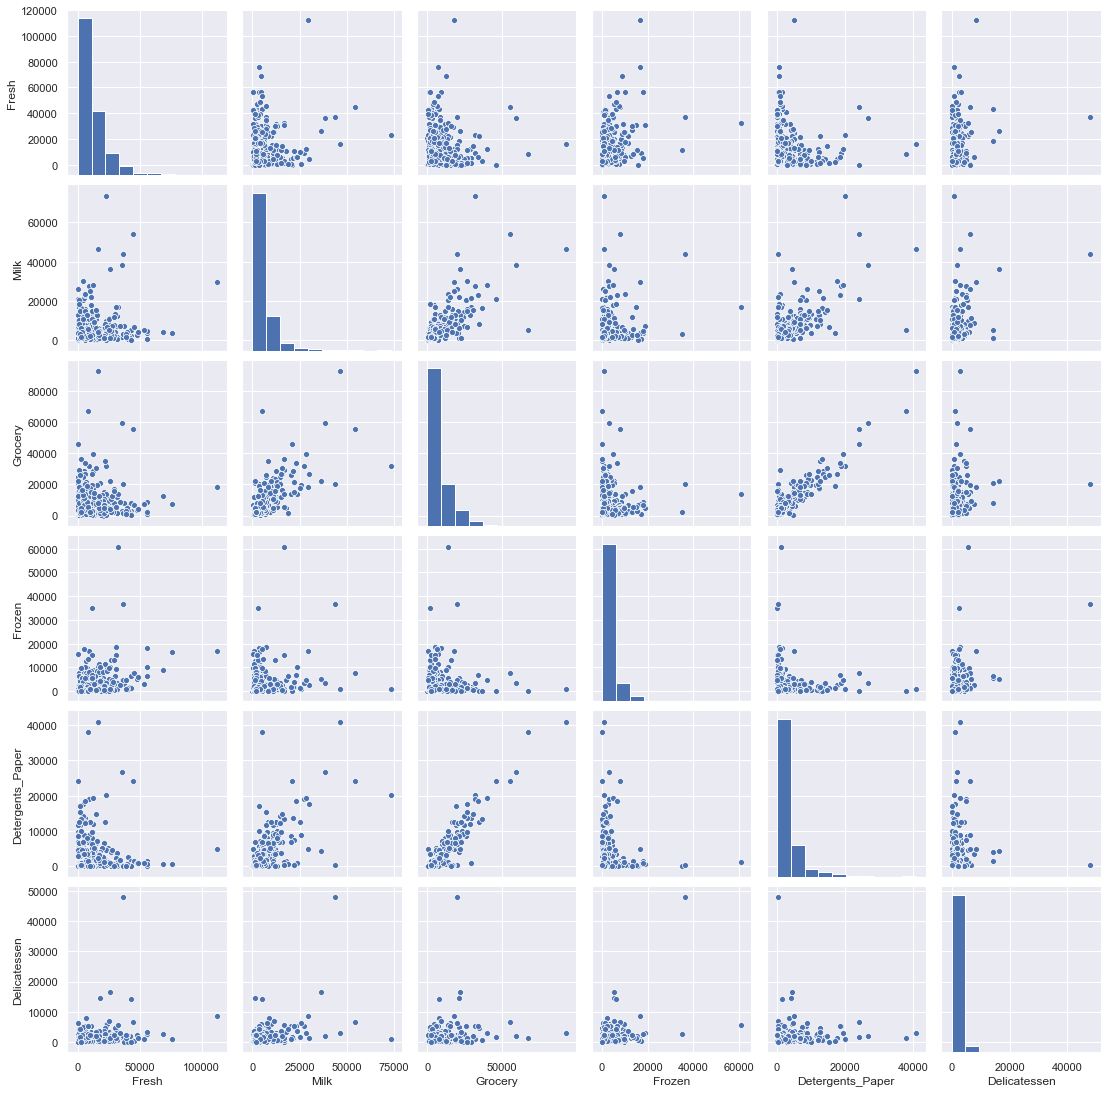

In [13]:
sns.pairplot(wcdf[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']])

# 1.2. There are 6 different varieties of items are considered.

Do all varieties show similar behaviour across Region and Channel?

In [14]:
wcspendsum

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  
Region Channel                
Lisbon Hotel           70632  
       Retail          33695  
Oporto Hotel           30965  
       Retail          23541  
Other  Hotel          320358  
       Retail         191752

The table is summarized by grouping whole data in terms of  'Region‘ and 'Channel‘ and then finding the sum of all numerical values
We use  “groupby(['Region', 'Channel']).sum()” function.

Now ,we have the table sorted according to region and showing the total sum of numerical values related to the corresponding region.


From above matrix,

we can deduce the following about all 6 variables across region and channel. 

'Fresh' decreases accross channels for all 3 regions

'Milk' decreases accross channels for Lisbon while increases accross channels for 'Opporto' and 'other'

'Grocery' increases accross channels for all 3 regions

'Frozen' decreases accross channels for all 3 regions

'Detergents_Paper' increases accross channels for all 3 regions

'Delicatessen' decreases accross channels for all 3 regions


1.3 

Which item shows the most inconsistent behaviour?

Which items shows the least inconsistent behaviour?

In [15]:
wclisb = wcspendsum[0:2]
wclisb

Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                      
Lisbon Hotel    761233  228342   237542  184512             56081   
       Retail    93600  194112   332495   46514            148055   

                Delicatessen  
Region Channel                
Lisbon Hotel           70632  
       Retail          33695

In [16]:
wclisb.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,2.000000,2.00000,2.000000,2.00000,2.000000,2.000000
mean,427416.500000,211227.00000,285018.500000,115513.00000,102068.000000,52163.500000
std,472087.821644,24204.26512,67141.910194,97579.32159,65035.439093,26118.403177
min,93600.000000,194112.00000,237542.000000,46514.00000,56081.000000,33695.000000
25%,260508.250000,202669.50000,261280.250000,81013.50000,79074.500000,42929.250000
50%,427416.500000,211227.00000,285018.500000,115513.00000,102068.000000,52163.500000
75%,594324.750000,219784.50000,308756.750000,150012.50000,125061.500000,61397.750000
max,761233.000000,228342.00000,332495.000000,184512.00000,148055.000000,70632.000000


In [17]:
wcopp = wcspendsum[2:4]
wcopp

Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                      
Oporto Hotel    326215   64519   123074  160861             13516   
       Retail   138506  174625   310200   29271            159795   

                Delicatessen  
Region Channel                
Oporto Hotel           30965  
       Retail          23541

In [18]:
wcopp.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,232360.50000,119572.000000,216637.000000,95066.000000,86655.500000,27253.000000
std,132730.30679,77856.699249,132318.063536,93048.181336,103434.872845,5249.560744
min,138506.00000,64519.000000,123074.000000,29271.000000,13516.000000,23541.000000
25%,185433.25000,92045.500000,169855.500000,62168.500000,50085.750000,25397.000000
50%,232360.50000,119572.000000,216637.000000,95066.000000,86655.500000,27253.000000
75%,279287.75000,147098.500000,263418.500000,127963.500000,123225.250000,29109.000000
max,326215.00000,174625.000000,310200.000000,160861.000000,159795.000000,30965.000000


In [19]:
wcother = wcspendsum[4:6]
wcother

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  
Region Channel                
Other  Hotel          320358  
       Retail         191752

In [20]:
wcother.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.000000
mean,1.980288e+06,9.443795e+05,1.247626e+06,465246.000000,445205.000000,256055.000000
std,1.340647e+06,2.950424e+05,6.046109e+05,433258.466969,394869.639818,90938.174701
min,1.032308e+06,7.357530e+05,8.201010e+05,158886.000000,165990.000000,191752.000000
25%,1.506298e+06,8.400662e+05,1.033863e+06,312066.000000,305597.500000,223903.500000
50%,1.980288e+06,9.443795e+05,1.247626e+06,465246.000000,445205.000000,256055.000000
75%,2.454279e+06,1.048693e+06,1.461388e+06,618426.000000,584812.500000,288206.500000
max,2.928269e+06,1.153006e+06,1.675150e+06,771606.000000,724420.000000,320358.000000


In [21]:
wcspendmean = wcspend.groupby(['Region', 'Channel']).mean()
wcspendmean

Fresh          Milk       Grocery       Frozen  \
Region Channel                                                          
Lisbon Hotel    12902.254237   3870.203390   4026.135593  3127.322034   
       Retail    5200.000000  10784.000000  18471.944444  2584.111111   
Oporto Hotel    11650.535714   2304.250000   4395.500000  5745.035714   
       Retail    7289.789474   9190.789474  16326.315789  1540.578947   
Other  Hotel    13878.052133   3486.981043   3886.734597  3656.900474   
       Retail    9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper  Delicatessen  
Region Channel                                  
Lisbon Hotel          950.525424   1197.152542  
       Retail        8225.277778   1871.944444  
Oporto Hotel          482.714286   1105.892857  
       Retail        8410.263158   1239.000000  
Other  Hotel          786.682464   1518.284360  
       Retail        6899.238095   1826.209524

In [22]:
wcspendmean.max()

Fresh               13878.052133
Milk                10981.009524
Grocery             18471.944444
Frozen               5745.035714
Detergents_Paper     8410.263158
Delicatessen         1871.944444
dtype: float64

In [23]:
wcspendmean.mean()

Fresh               10125.356053
Milk                 6769.538905
Grocery             10510.073325
Frozen               3027.858047
Detergents_Paper     4292.450201
Delicatessen         1459.747288
dtype: float64

In [24]:
wcdf.skew()

Buyer/Spender        0.000000
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

'Delicatessen' shows most inconsistent behaviour

1.4 Below we plot boxplots, to see if there are outliers in the data

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

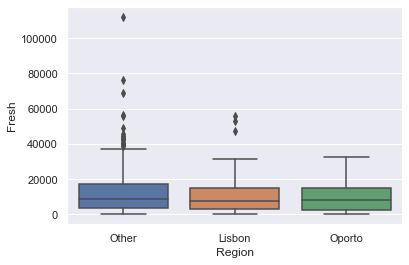

In [25]:
sns.boxplot(wcdf['Region'], wcdf['Fresh'])
plt.xticks(rotation=0)

In [26]:
wcdf.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

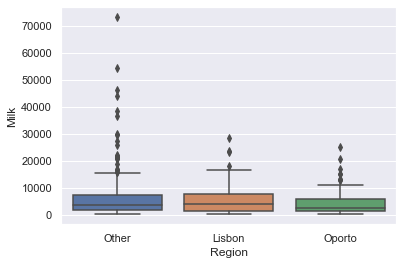

In [27]:
sns.boxplot(wcdf['Region'], wcdf['Milk'])
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

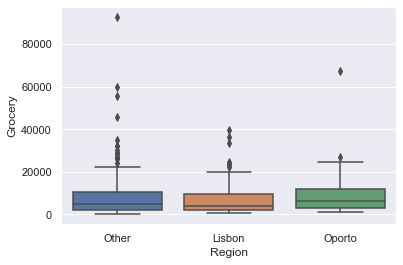

In [28]:
sns.boxplot(wcdf['Region'], wcdf['Grocery'])
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

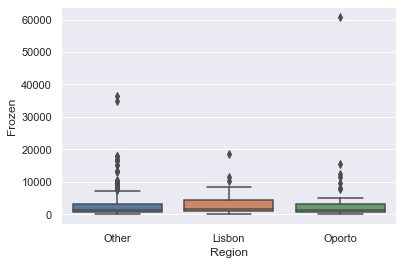

In [29]:
sns.boxplot(wcdf['Region'], wcdf['Frozen'])
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

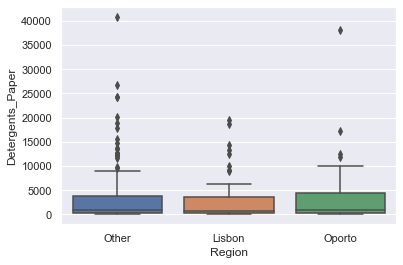

In [30]:
sns.boxplot(wcdf['Region'], wcdf['Detergents_Paper'])
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

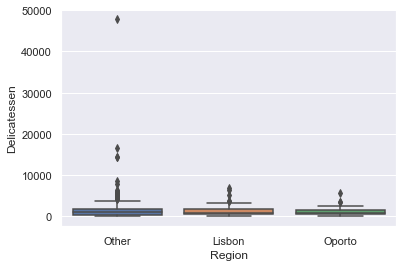

In [31]:
sns.boxplot(wcdf['Region'], wcdf['Delicatessen'])
plt.xticks(rotation=0)

Thus we can see that there are outliers present in 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'

In [32]:
wcdf.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000



## Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).

In [33]:
sdf = pd.read_csv('Survey.csv')
sdf.head(2)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50


In [34]:
sdf.tail(2)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [35]:
 print('Survey has {} samples with {} features each'.format(*sdf.shape))

Survey has 62 samples with 14 features each


In [36]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [37]:
sdf.isnull().values.any()

False

So, the survey data has no null values

In [38]:
sdf.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [70]:
sdf['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

Part I

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

In [39]:
pd.crosstab(sdf['Gender'], sdf['Major'], margins = True) 

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


2.1.2. Gender and Grad Intention

In [40]:
pd.crosstab(sdf['Gender'], sdf['Grad Intention'], margins = True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


2.1.3. Gender and Employment

In [41]:
pd.crosstab(sdf['Gender'], sdf['Employment'], margins = True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


2.1.4. Gender and Computer

In [42]:
pd.crosstab(sdf['Gender'], sdf['Computer'], margins = True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


2.2.1. What is the probability that a randomly selected CMSU student will be male?
What is the probability that a randomly selected CMSU student will be female?

In [43]:
sdf['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [44]:
cmsu_probability_male = sdf['Gender'].value_counts()[1]/(sdf['Gender'].value_counts().sum())
cmsu_probability_male

0.46774193548387094

In [45]:
cmsu_probability_female = sdf['Gender'].value_counts()[0]/(sdf['Gender'].value_counts().sum())
cmsu_probability_female

0.532258064516129

2.2.2. Find the conditional probability of different majors among the male students in CMSU.
Find the conditional probability of different majors among the female students of CMSU.

In [46]:
majorct = pd.crosstab(sdf['Gender'], sdf['Major'], margins = True) 
majorct

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


A|M = 4/29
CIS|M = 1/29
E|M = 4/29
IB|M = 2/29
M|M = 6/29
O|M = 4/29
R|M = 5/29
U|M = 3/29

A|F = 3/33
CIS|F = 3/33
E|F = 7/33
IB|F = 4/33
M|F = 4/33
O|F = 3/33
R|F = 9/33
U|F = 0

2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
Find the conditional probability of intent to graduate, given that the student is a female.


In [47]:
gradintct = pd.crosstab(sdf['Gender'], sdf['Grad Intention'], margins = True)
gradintct

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


p_y|m = 17/29

p_y|f = 11/33

2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [48]:
pd.crosstab(sdf['Gender'], sdf['Employment'], margins = True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


FT|M = 7/29
PT|M = 19/29
U|M = 3/29
FT|F = 3/33
PT|F = 24/33
U|F = 6/33

2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [49]:
pd.crosstab(sdf['Gender'], sdf['Computer'], margins = True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


D|M = 3/29
L|M = 26/29
T|M = 0
D|F = 2/33
L|F = 29/33
T|F = 2/33

2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender?
Justify your comment in each case.

Part II

2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
Write a note summarizing your conclusions.
[Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

In [50]:
sdf24 = sdf[['ID','Gender', 'Salary', 'Spending', 'Text Messages']]
sdf24

,ID,Gender,Salary,Spending,Text Messages
0,1,Female,50.0,350,200
1,2,Male,25.0,360,50
2,3,Male,45.0,600,200
3,4,Male,40.0,600,250
4,5,Male,40.0,500,100
...,...,...,...,...,...
57,58,Female,40.0,1000,10
58,59,Female,40.0,350,250
59,60,Female,55.0,500,500
60,61,Female,30.0,490,50


By using the function scipy.stats.normaltest, we can test the hypothesis whether a sample differs from/follows a normal distribution. This function tests the null hypothesis that the sample follows a normal distribution.

In [51]:
alpha = 0.05

In [52]:
x1 = sdf['Salary']
stats.normaltest(x1)

NormaltestResult(statistic=3.84580947969415, pvalue=0.14618172494628334)

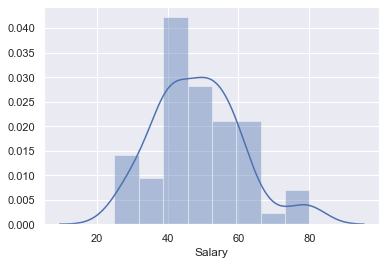

In [66]:
ax = sns.distplot(x1)

Since pvalue is greater than alpha, null hypothesis, that the sample follows a normal distribution, cannot be rejected

In [54]:
x2 = sdf['Spending']
stats.normaltest(x2)

NormaltestResult(statistic=30.49562450314631, pvalue=2.387587398454289e-07)

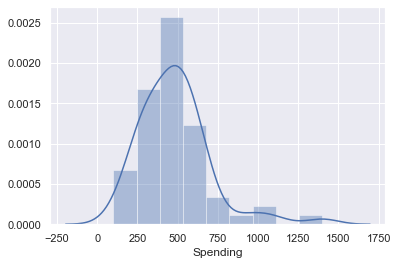

In [67]:
ax = sns.distplot(x2)

Since pvalue is smaller than alpha, null hypothesis, that the sample follows a normal distribution, can be rejected

In [55]:
x3 = sdf['Text Messages']
stats.normaltest(x3)

NormaltestResult(statistic=16.34755294390911, pvalue=0.0002819512224692029)

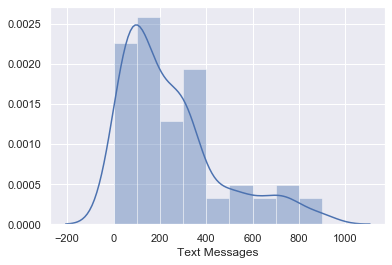

In [68]:
ax = sns.distplot(x3)

Since pvalue is smaller than alpha, null hypothesis, that the sample follows a normal distribution, can be rejected

## Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company claims that the mean moisture content cannot be greater than 0.35 pound per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet  is given:

LaTeX: H_0<=0.35

LaTeX: H_A>0.35

For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:

LaTeX: H_0<=0.35

LaTeX: H_B>0.35

3.1 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

3.2 What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

In [57]:
absdf = pd.read_csv('A & B shingles.csv')
absdf.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [58]:
absdf['A'].mean()

0.3166666666666666

So, we can see that the sample mean X_barA is 0.3167

In [59]:
absdf['A'].std()

0.13573082605973166

So, we can see that the sample standard deviation of S_A is 0.1357

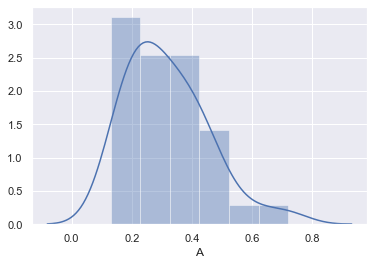

In [71]:
ax = sns.distplot(absdf['A'])

In [60]:
absdf['B'].mean()

0.2735483870967742

So, we can see that the sample mean X_barB is 0.2735

In [61]:
absdf['B'].std()

0.13729647694185443

So, we can see that the sample standard deviation of S_B is 0.1372

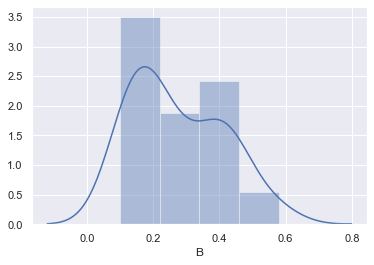

In [72]:
ax = sns.distplot(absdf['B'])

Population mean of A and B are assumed as 0.35, as given in the hypothesis to analyze

we also have the sample mean of A and B and sample standard deviation of A and B

n_A = 36,   n_B = 31

Given in the problem,

For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound (mu_A) per 100 square feet  is given:

H_0<=0.35

H_a>0.35

For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound (mu_B) per 100 square feet is given:

H_0<=0.35

H_a>0.35

Based on above inputs, We'll go with the t_stat test 

Solving below for A,

In [62]:
X_barA = 0.3167
mu_A = 0.35 
S_A = 0.1357
n_A = 36
tstat_A = (X_barA - mu_A)/(S_A/np.sqrt(n_A))
tstat_A

-1.4723655121591748

Here for A, as tstat_A > -1.69 (critical), we fail to reject null hypothesis, 

therefore mu_A <=0.35, mean of shingles A is equal to 0.35

Solving below for B,

In [63]:
X_barB = 0.2735
mu_B = 0.35 
S_B = 0.1372
n_B = 31
tstat_B = (X_barB - mu_B)/(S_B/np.sqrt(n_B))
tstat_B

-3.1044750273797117

Here for B, as tstat_B < -1.69 (critical), we reject the null hypothesis, 

therefore mu_B > 0.35, mean of shingles B is greater than 0.35

Because  mu_A <=0.35 and mu_B > 0.35, we can conclude that population means for shingles A and B are not equal

We assume that the populations of A and B are simple random samples and approximately normally distributed. Also sample size is sufficiently large, hence sample standard deviation is approximated with population standard deviation.